In [3]:
%matplotlib inline
import pandas as pd

In [4]:
csv_f = pd.read_csv("/content/bestsellers with categories.csv", sep=',' , encoding='utf-8')

# for column in numeric_columns:
#    df[column] = pd.to_numeric(df[column], errors='coerce')
csv_f.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
csv_f.shape

(550, 7)

In [6]:
csv_f.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [7]:
print(f"Про скільки книг зберігає дані датасет?\nВідповідь: {len(csv_f['Name'].unique())}")

Про скільки книг зберігає дані датасет?
Відповідь: 351


In [8]:
csv_f.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [9]:
(csv_f.isna().sum() / len(csv_f)) * 100

name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64

Чи є в якихось змінних пропуски?
Відповідь: Ні

In [10]:
print(f"Які є унікальні жанри?\nВідповідь {csv_f['genre'].unique()}")

Які є унікальні жанри?
Відповідь ['Non Fiction' 'Fiction']


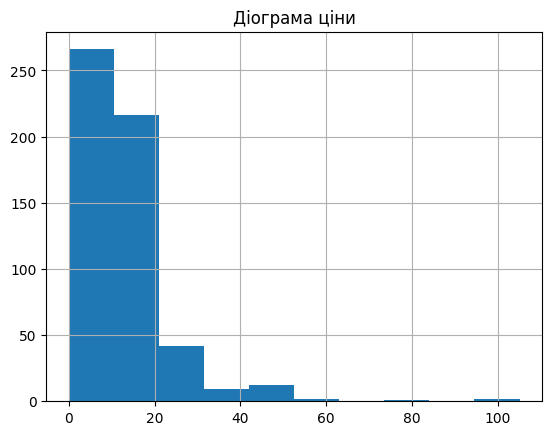

In [11]:
import matplotlib.pyplot as plt
colums_to = ['price']
csv_f[colums_to].hist()
plt.title(f'Діограма ціни')
# plt.xlabel('ціна')
# plt.ylabel('назва')
# plt.xticks(rotation=90)  # Обертання назв регіонів для зручності
#plt.tight_layout()
plt.show()

In [12]:
print(f"Максимальна ціна?\nВідповідь: {csv_f['price'].max()}")

Максимальна ціна?
Відповідь: 105


In [13]:
print(f"Мінімальна ціна?\nВідповідь: {csv_f['price'].min()}")

Мінімальна ціна?
Відповідь: 0


In [14]:
print(f"Середня ціна?\nВідповідь: {csv_f['price'].mean()}")

Середня ціна?
Відповідь: 13.1


In [15]:
print(f"Середня ціна?\nВідповідь: {csv_f['price'].median()}")

Середня ціна?
Відповідь: 11.0


In [16]:
print(f"Який рейтинг у датасеті найвищий?\nВідповідь: {csv_f['user_rating'].max()}")

Який рейтинг у датасеті найвищий?
Відповідь: 4.9


In [17]:
rating = csv_f['user_rating'].max()
count_rat = csv_f[csv_f['user_rating'] == rating]
print(f"Який рейтинг у датасеті найвищий?\nВідповідь: {len(count_rat)}")

Який рейтинг у датасеті найвищий?
Відповідь: 52


In [18]:
book_name = csv_f[csv_f['reviews'] == csv_f['reviews'].max()]['name'].values[0]
print(f"Яка книга має найбільше відгуків?\nВідповідь: {book_name}")

Яка книга має найбільше відгуків?
Відповідь: Where the Crawdads Sing


In [19]:
book_2015 = csv_f[csv_f['year'] == 2015]
book_n_2015 = book_2015[book_2015['price'] == book_2015['price'].max()]['name'].values[0]
print(f"З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?\nВідповідь: {book_n_2015}")

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча?
Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [20]:
#Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році ? Відповідь:
book_count_2010 = csv_f[(csv_f['year'] == 2010) & (csv_f['genre'] == 'Fiction')]
print(f"Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році ?\nВідповідь: {len(book_count_2010)}")

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році ?
Відповідь: 20


In [21]:
#Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь
years_search = [2010, 2011]
print(f"Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках ?\nВідповідь: {len(csv_f[(csv_f['year'].isin(years_search)) & (csv_f['user_rating'] == 4.9)])}")

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках ?
Відповідь: 1


In [22]:
sort_book = csv_f[(csv_f['year'] == 2015) & (csv_f['price'] < 8)].sort_values('price').tail(1)
print(f"Яка книга остання у відсортованому списку? Відповідь: {sort_book['name'].values[0]}")

Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)


In [23]:
agreg = csv_f.groupby('genre').agg({'price': ['min', 'max']})
agreg

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

In [24]:
print(f"Максимальна ціна для жанру Fiction:\nВідповідь: {agreg.loc['Fiction', ('price', 'max')]}")

Максимальна ціна для жанру Fiction:
Відповідь: 82


In [25]:
print(f"Мінімальна ціна для жанру Fiction:\nВідповідь: {agreg.loc['Fiction', ('price', 'min')]}")

Мінімальна ціна для жанру Fiction:
Відповідь: 0


In [26]:
print(f"Максимальна ціна для жанру Non Fiction:\nВідповідь: {agreg.loc['Non Fiction', ('price', 'max')]}")

Максимальна ціна для жанру Non Fiction:
Відповідь: 105


In [27]:
print(f"Мінімальна ціна для жанру Non Fiction:\nВідповідь: {agreg.loc['Non Fiction', ('price', 'min')]}")

Мінімальна ціна для жанру Non Fiction:
Відповідь: 0


In [57]:
#csv_f.info()
book_count = csv_f.groupby('author').agg({'name' : 'count'})
book_count

,name
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [29]:
print(f"Якої розмірності вийшла таблиця?\nВідповідь:{book_count.shape}")

Якої розмірності вийшла таблиця?
Відповідь:(248, 1)


In [30]:
aut_max_bok = book_count[book_count['name'] == book_count['name'].max()]
aut_max_bok
print(f"Який автор має найбільше книг?\nВідповідь: {aut_max_bok.index[0]}")

Який автор має найбільше книг?
Відповідь: Jeff Kinney


In [31]:
print(f"Скільки книг цього автора?\nВідповідь: {aut_max_bok.values[0][0]}")

Скільки книг цього автора?
Відповідь: 12


In [32]:
rating_auth = csv_f.groupby('author').agg({'reviews': 'mean'})

In [33]:
resp_1 = rating_auth[rating_auth['reviews'] == rating_auth['reviews'].min()]
print(f"У якого автора середній рейтинг мінімальний?\nВідповідь: {resp_1.index[0]}")

У якого автора середній рейтинг мінімальний?
Відповідь: Zhi Gang Sha


In [34]:
print(f"Який у цього автора середній рейтинг?\nВідповідь: {resp_1.values[0][0]}")

Який у цього автора середній рейтинг?
Відповідь: 128.5


In [35]:
group_t = pd.concat([book_count, rating_auth], axis=1)
group_t

,name,reviews
author,,
Abraham Verghese,2,4866.000000
Adam Gasiewski,1,3113.000000
Adam Mansbach,1,9568.000000
Adir Levy,1,8170.000000
Admiral William H. McRaven,1,10199.000000
...,...,...
Walter Isaacson,3,6222.666667
William Davis,2,7497.000000
William P. Young,2,19720.000000


In [50]:
group_t.sort_values(by=['name','reviews'])

,name,reviews
author,,
Peter A. Lillback,1,408.000000
Edward M. Kennedy,1,438.000000
Jon Stewart,1,440.000000
Larry Schweikart,1,460.000000
Mark Twain,1,491.000000
...,...,...
American Psychological Association,10,8580.000000
Rick Riordan,11,4015.363636
Gary Chapman,11,13268.909091


In [37]:
resp_2 = group_t.sort_values(by=['name','reviews'])
resp_2.head(1)

,name,reviews
author,,
Peter A. Lillback,1,408.0


In [38]:
print(f"Який автор перший у списку?\nВідповідь: {resp_2.index[0]}")

Який автор перший у списку?
Відповідь: Peter A. Lillback


In [81]:
csv_f.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


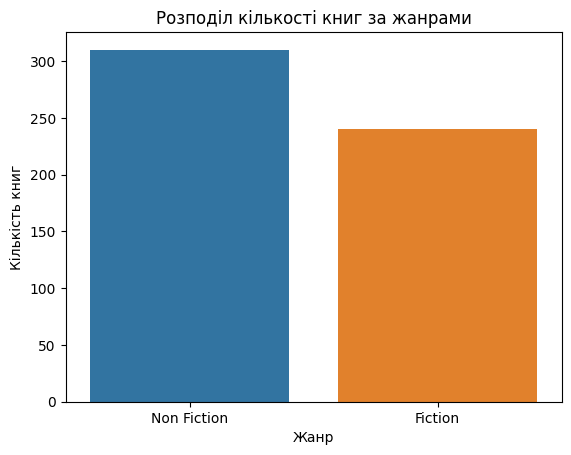

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
genre_counts = csv_f['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Розподіл кількості книг за жанрами')
plt.xlabel('Жанр')
plt.ylabel('Кількість книг')
plt.show()


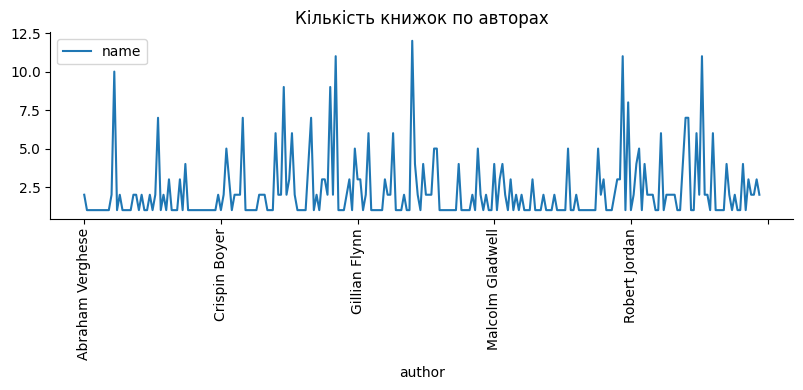

In [49]:
from matplotlib import pyplot as plt
book_count['name'].plot(kind='line', figsize=(8, 4), title='Кількість книжок по авторах')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()

In [100]:
maen_rating = csv_f.groupby('author').agg({'user_rating': 'mean'})

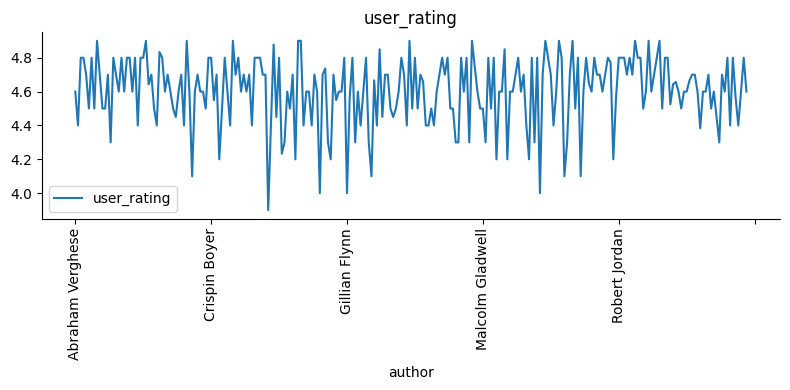

In [102]:
from matplotlib import pyplot as plt
maen_rating['user_rating'].plot(kind='line', figsize=(8, 4), title='user_rating')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.xticks(rotation=90)
plt.legend()

plt.tight_layout()